# Major Project

In [1]:
import numpy as np 
import pandas as pd 

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Libraries for Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
# Libraries for Metrics
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data = pd.read_csv('/Users/sheelendersharma1/Desktop/data sciece/heart.csv')
print("Number of rows in the dataset: {}".format(data.shape[0]))
print("Number of cols in the dataset: {}".format(data.shape[1]))

Number of rows in the dataset: 918
Number of cols in the dataset: 12


In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
data.describe().T.style.background_gradient(cmap='copper')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


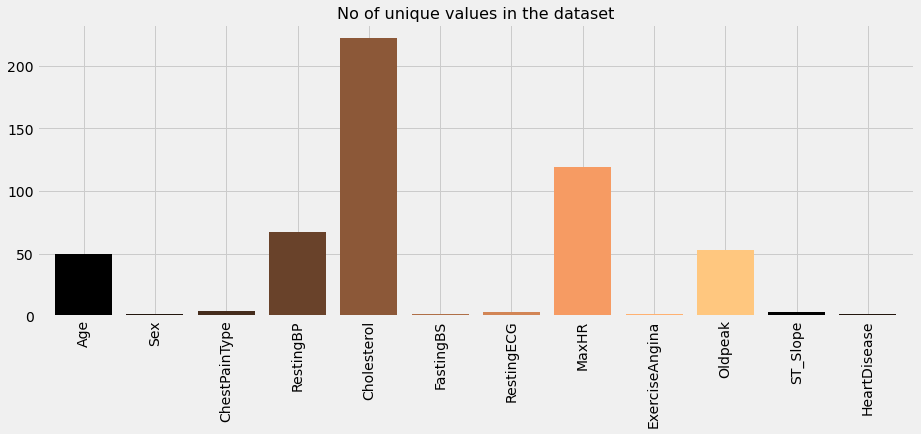

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [10]:
color = plt.cm.copper(np.linspace(0, 1, 10))
plt.figure(figsize=(14,5))
data.nunique().plot(kind='bar', width=.8, color=color)
plt.title('No of unique values in the dataset', size=16)
plt.show()
print(data.nunique())

In [12]:
discrette_feature = [i for i in data.columns if data[i].nunique() < 10]
continuous_feature = [i for i in data.columns if data[i].nunique() > 10]
print(f'discrette feature: {discrette_feature}')
print(f'continuous feature: {continuous_feature}')

discrette feature: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
continuous feature: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


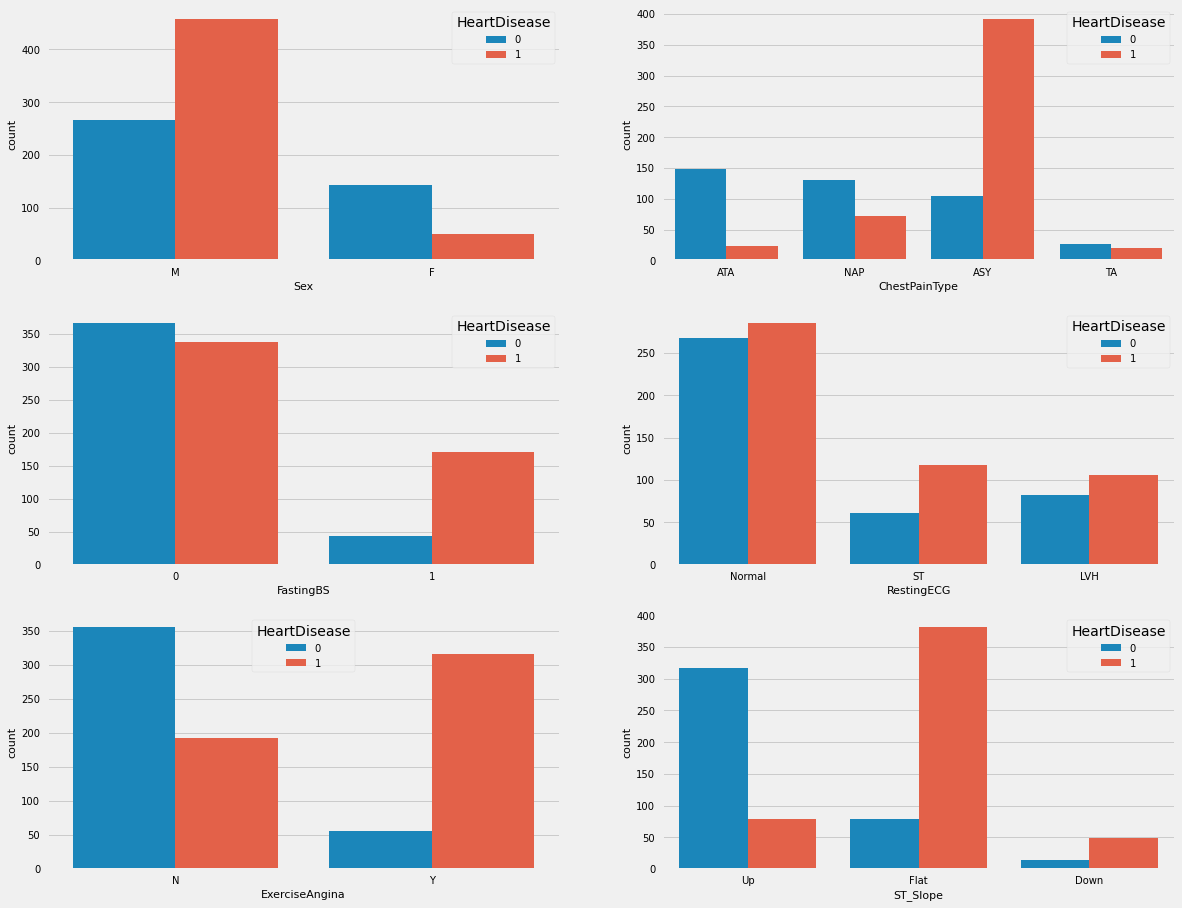

In [13]:
plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(18,20)) 
for feature in discrette_feature[:-1]:
    plt.subplot(4, 2, i)
    sns.countplot(x=data[feature], hue=data.HeartDisease)
    i += 1
    
plt.show()

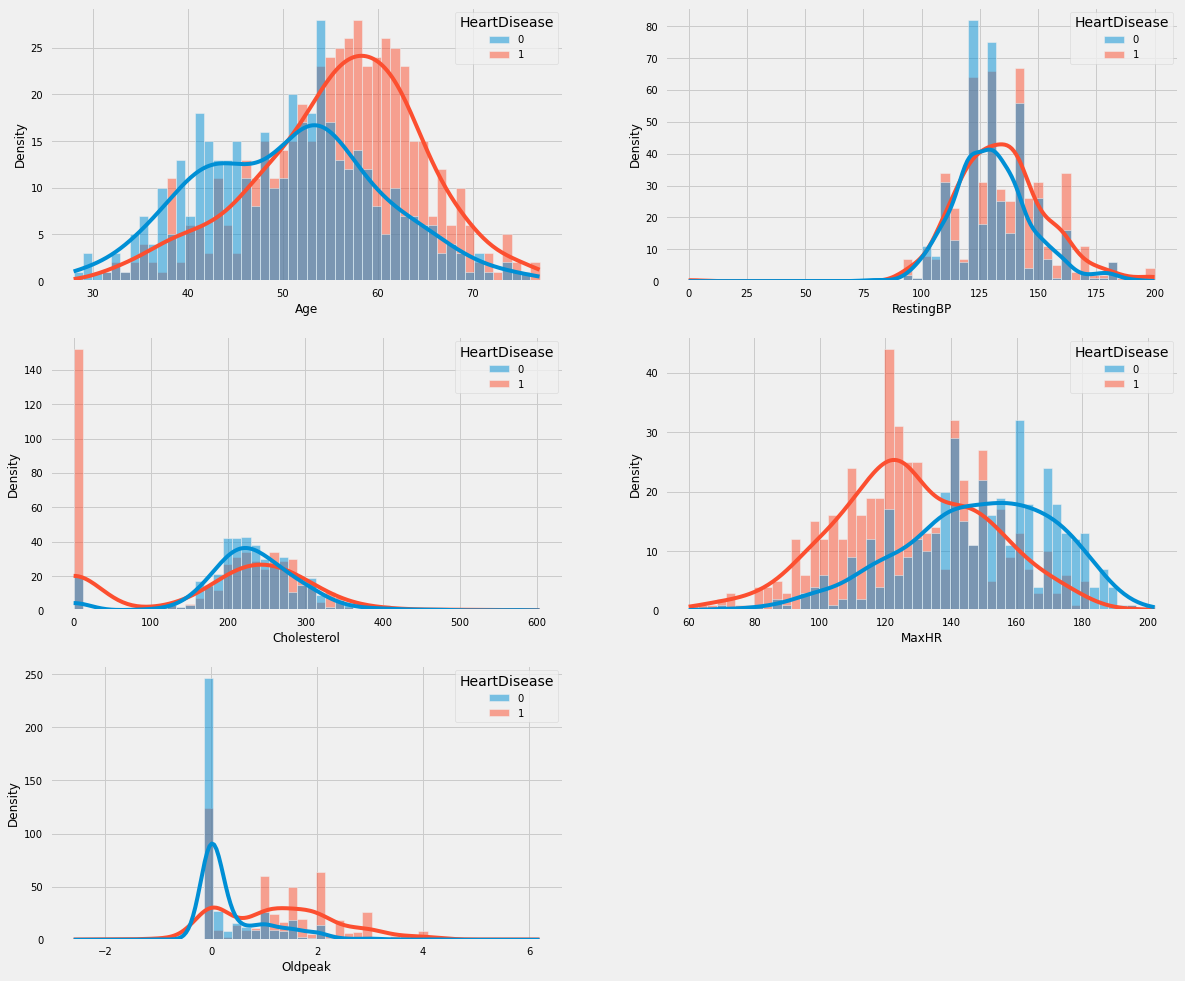

In [14]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.histplot(x=data[feature],kde=True,bins=50, hue=data.HeartDisease)
    plt.xlabel(feature,size=12)
    plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

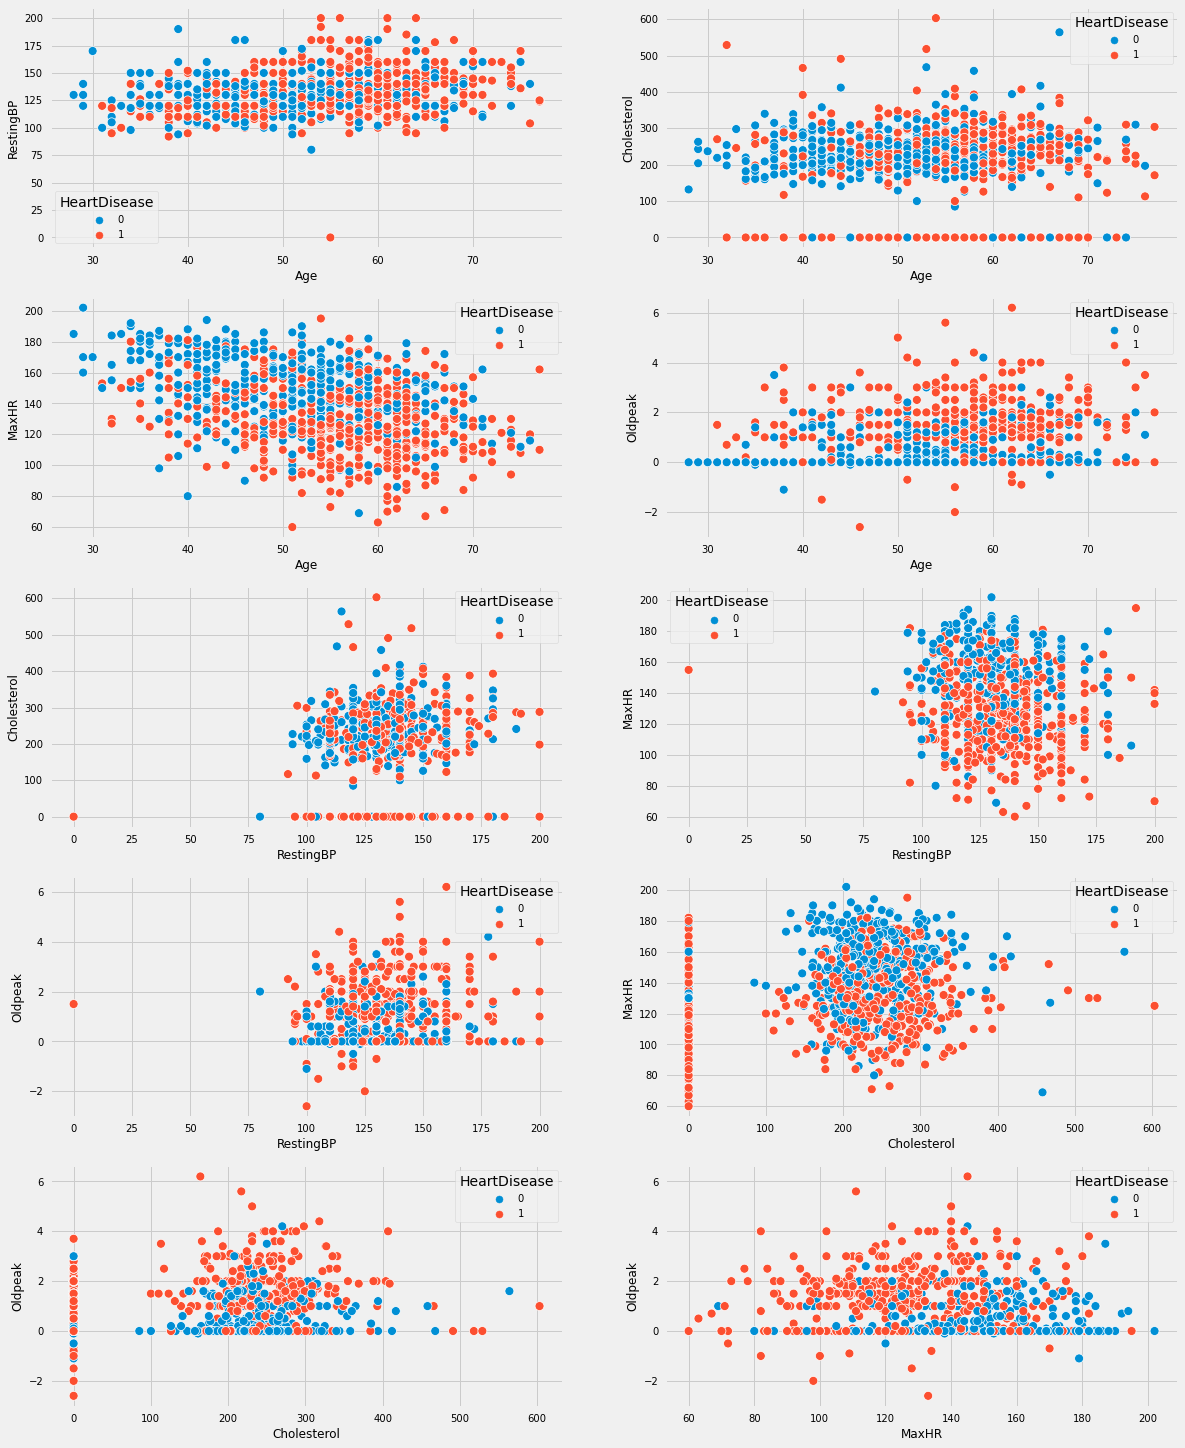

In [15]:
i = 1
n = 1
plt.figure(figsize=(18,24)) 
for feature in continuous_feature:
    for i_ in continuous_feature[n:]:
        plt.subplot(5, 2, i)
        sns.scatterplot(x=data[feature],y=data[i_], s=80, hue=data.HeartDisease)
        plt.xlabel(feature,size=12)
        plt.ylabel(i_,size=12)
        i += 1
    n+=1
plt.show() 

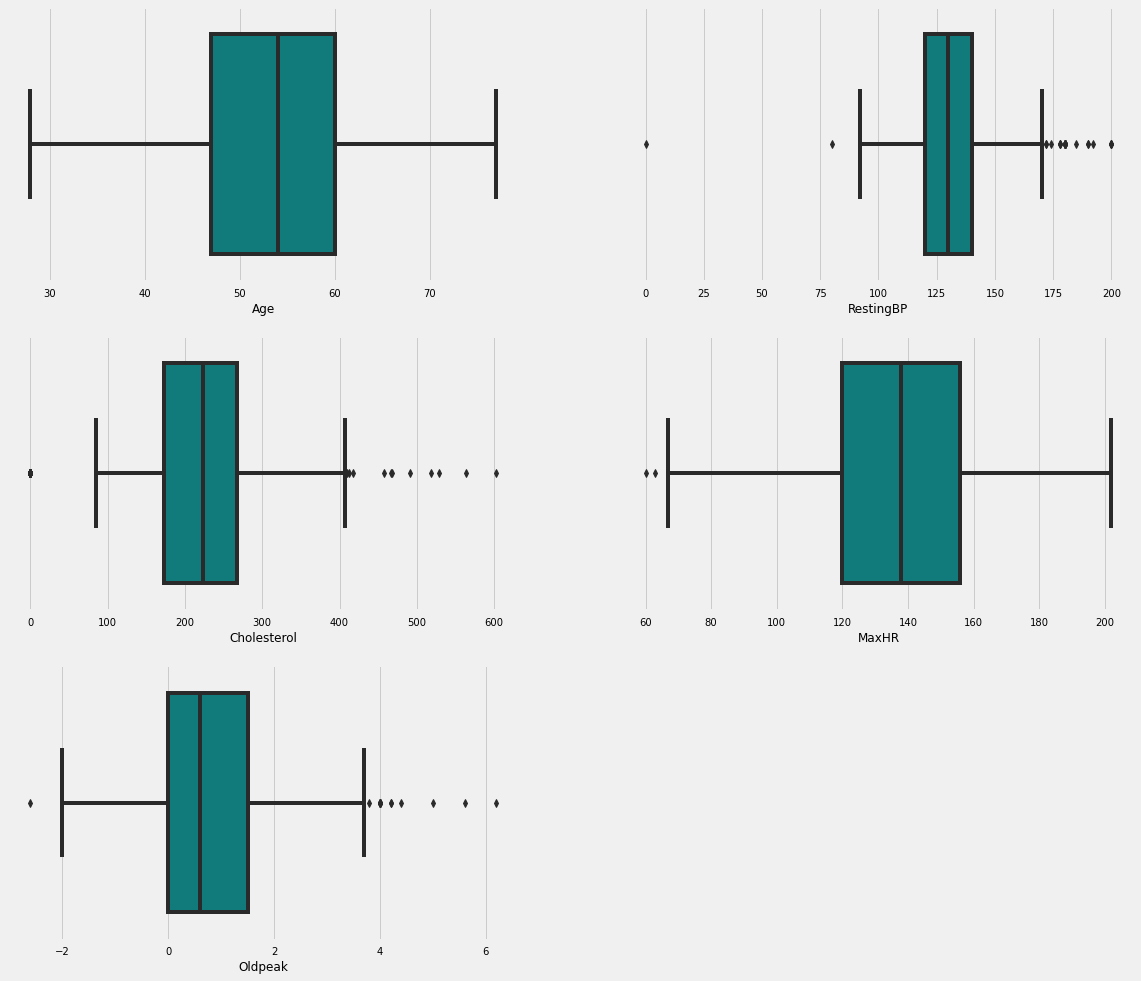

In [16]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x=feature, hue='HeartDisease', color='darkcyan')
    plt.xlabel(feature,size=12)
#     plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

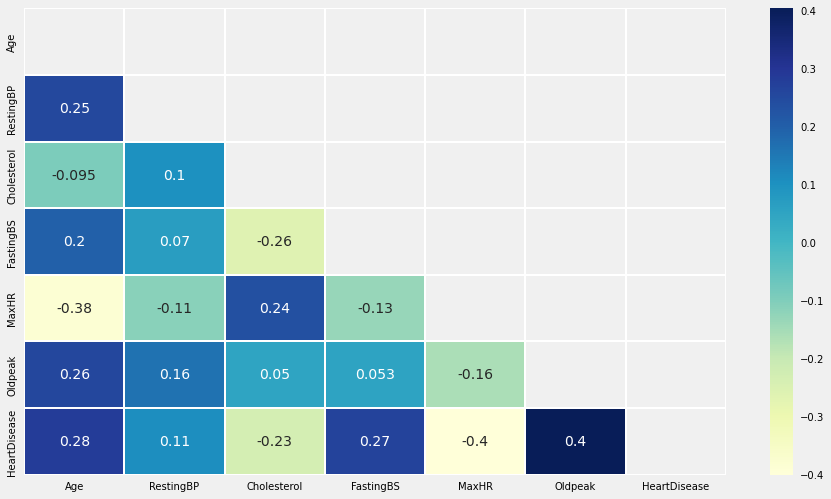

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), mask=np.triu(data.corr()), annot=True, cmap='YlGnBu',linewidth=2)
plt.show()

# ML 

In [19]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape: (734, 11)
y_train shape: (734,)
x_test shape : (184, 11)
y_test shape : (184,)


In [22]:
transformer = ColumnTransformer(transformers = [('onehot', OneHotEncoder(sparse=False, drop='first'), [1,2,6,8,10]),
                                                ('scaler', StandardScaler(), [0,3,4,5,7,9])],
                                      remainder = 'passthrough')
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [23]:
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(x_train, y_train)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(x_test)
    cross_validation_score = cross_val(x_train,y_train, classifier)
    accuracy = accuracy_score(y_test, prediction)
    con_metrix = confusion_matrix(y_test, prediction)
    
    return accuracy,con_metrix, cross_validation_score

def cross_val(x_train, y_train, classifier):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

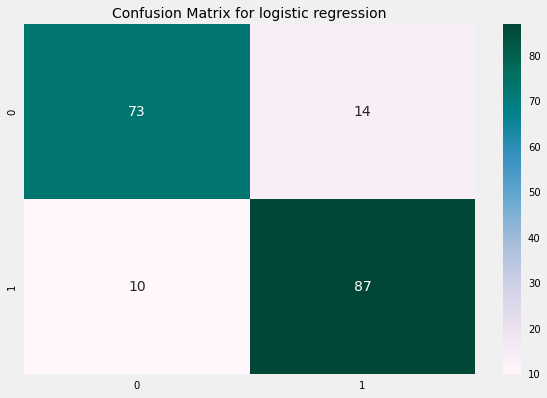

Logistic Regression Performace on the training data have an accuracy score of 86.0
Logistic Regression Performace on the testing data have an accuracy score of 87.0


In [24]:
logistic_reg = LogisticRegression()
accuracy,con_metrix, cross_validation_score = do_prediction(logistic_reg)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for logistic regression',size=14)
plt.show()
print('Logistic Regression Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Logistic Regression Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

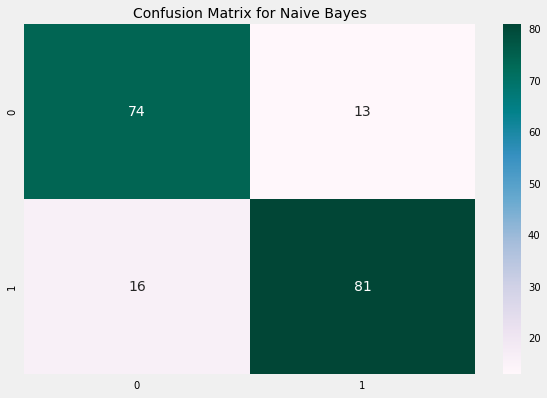

Naive Bayes Performace on the training data have an accuracy score of 86.0
Naive Bayes Performace on the testing data have an accuracy score of 84.0


In [25]:
gaussian = GaussianNB()
accuracy,con_metrix, cross_validation_score = do_prediction(gaussian)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for Naive Bayes',size=14)
plt.show()
print('Naive Bayes Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Naive Bayes Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

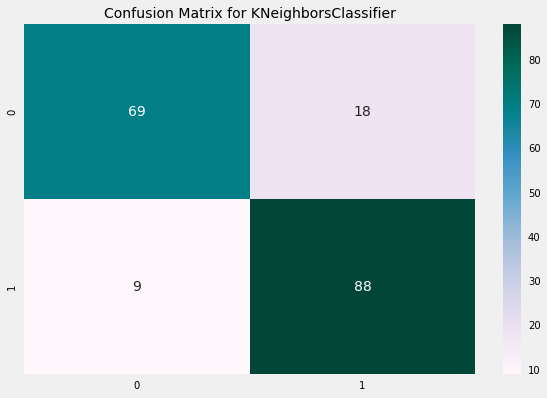

 KNeighborsClassifier Performace on the training data have an accuracy score of 84.0
 KNeighborsClassifierPerformace on the testing data have an accuracy score of 85.0


In [26]:
KNN =  KNeighborsClassifier()
accuracy,con_metrix, cross_validation_score = do_prediction(KNN)
plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for KNeighborsClassifier',size=14)
plt.show()
print(' KNeighborsClassifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print(' KNeighborsClassifierPerformace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

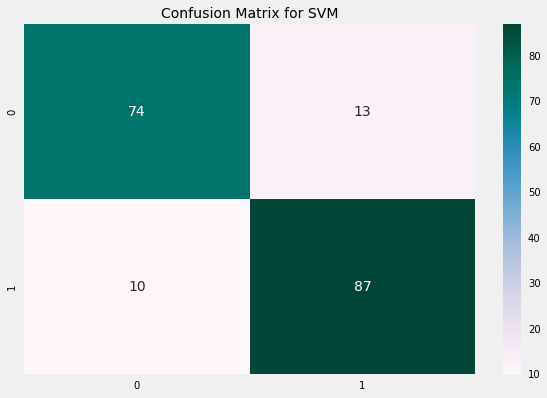

Support Vector Machine Performace on the training data have an accuracy score of 86.0
Support Vector Machine Performace on the testing data have an accuracy score of 88.0


In [27]:
svm = SVC()
accuracy,con_metrix, cross_validation_score = do_prediction(svm)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for SVM',size=14)
plt.show()
print('Support Vector Machine Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Support Vector Machine Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

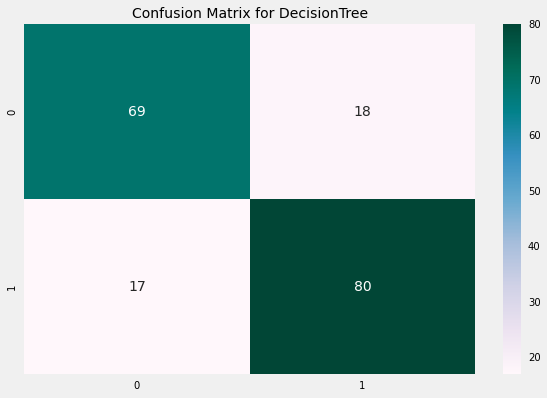

DecisionTree Performace on the training data have an accuracy score of 75.0
DecisionTree Performace on the testing data have an accuracy score of 81.0


In [28]:
DTCclassifier = DecisionTreeClassifier()
accuracy,con_metrix, cross_validation_score = do_prediction(DTCclassifier)
plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for DecisionTree',size=14)
plt.show()
print('DecisionTree Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('DecisionTree Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

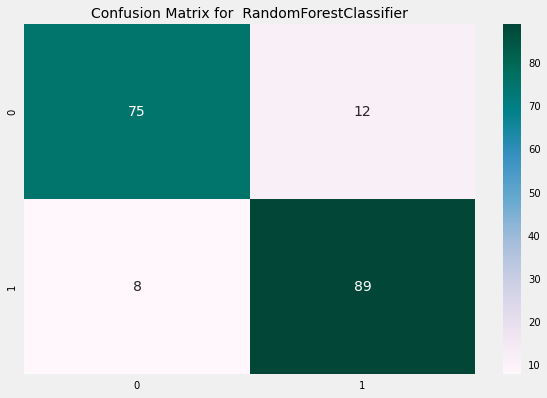

 RandomForestClassifier Performace on the training data have an accuracy score of 87.0
 RandomForestClassifierPerformace on the testing data have an accuracy score of 89.0


In [29]:
Rndforestclassifier =  RandomForestClassifier()
accuracy,con_metrix, cross_validation_score = do_prediction(Rndforestclassifier)
plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix for  RandomForestClassifier',size=14)
plt.show()
print(' RandomForestClassifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print(' RandomForestClassifierPerformace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )